# Problem Description:
Generate Word Embedding and retrieve outputs of each layer with Keras based
on the Classification task.
Word embedding are a type of word representation that allows words with
similar meaning to have a similar representation.
It is a distributed representation for the text that is perhaps one of the key
breakthroughs for the impressive performance of deep learning methods on
challenging natural language processing problems.
We will use the IMDb dataset to learn word embedding as we train our dataset.
This dataset contains 25,000 movie reviews from IMDB, labeled with a sentiment

# Data Description:
The Dataset of 25,000 movie reviews from IMDB, labeled by sentiment
(positive/negative). Reviews have been preprocessed, and each review is encoded
as a sequence of word indexes (integers). For convenience, the words are indexed
by their frequency in the dataset, meaning the for that has index 1 is the most
frequent word. Use the first 20 words from each review to speed up training,
using a max vocab size of 10,000.
As a convention, "0" does not stand for a specific word, but instead is used to
encode any unknown word.

# Importing the Required Libraries

In [1]:
from keras.preprocessing import sequence
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Bidirectional, LSTM, Activation, SpatialDropout1D
from keras.optimizers import Adam
from keras.datasets import imdb
from keras.callbacks import  TensorBoard
import matplotlib.pyplot as plt
from keras.regularizers import l2

# Loading the Dataset

In [2]:
import numpy as np
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

17465344/17464789 [==============================] - 0s 0us/step


# Performing Data Analysis

### Checking the data shape

In [3]:
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


### Summarize number of classes

In [4]:
print("Classes: ")
print(np.unique(y))

Classes: 
[0 1]


### Summarizing the number of unique words

In [5]:
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
88585


### Summarizing the average review length

Review length: 
Mean 234.76 words (172.911495)


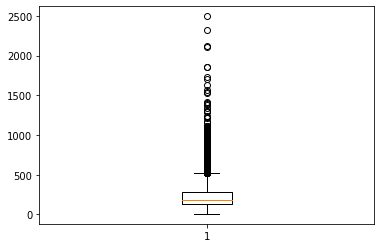

In [6]:
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

# Working with the Dataset

### Limiting the dataset to 10000 words and word length of 300

In [7]:
imdb.load_data(nb_words=10000)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 194, 1153, 194, 8255, 78, 

In [8]:
from keras.layers import Embedding
Embedding(10000, 100, input_length=300)

## Load the dataset but only keep the top 10000 words, zero the rest

In [9]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [10]:
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

## Generating the Word Index, Key Values and Padding

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[7]])
print(decoded_review)

1646592/1641221 [==============================] - 0s 0us/step
? the ? tells the story of the four hamilton siblings teenager francis ? ? twins ? joseph ? ? ? ? the ? david samuel who is now the surrogate parent in charge the ? move house a lot ? is unsure why is unhappy with the way things are the fact that his brother's sister kidnap ? murder people in the basement doesn't help relax or calm ? nerves either francis ? something just isn't right when he eventually finds out the truth things will never be the same again br br co written co produced directed by mitchell ? phil ? as the butcher brothers who's only other film director's credit so far is the april ? day 2008 remake enough said this was one of the ? to die ? at the 2006 after dark ? or whatever it's called in keeping with pretty much all the other's i've seen i thought the ? was complete total utter crap i found the character's really poor very unlikable the slow moving story failed to capture my imagination or sustain my in

In [12]:
print("length of word_index: ",len(word_index))

length of word_index:  88584


In [13]:
for keys,values in word_index.items():
    if values == 1:
        print(keys)

the


In [14]:
max_words = 300
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# Building the Sequential Model

In [15]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 9600)              0         
_________________________________________________________________
dense (Dense)                (None, 250)               2400250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 2,720,501
Trainable params: 2,720,501
Non-trainable params: 0
_________________________________________________________________
None


# Fitting the Model

In [17]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=2)

Epoch 1/20
196/196 - 2s - loss: 9.3922e-05 - accuracy: 1.0000 - val_loss: 0.6370 - val_accuracy: 0.8678
Epoch 2/20
196/196 - 2s - loss: 7.5987e-05 - accuracy: 1.0000 - val_loss: 0.6480 - val_accuracy: 0.8680
Epoch 3/20
196/196 - 2s - loss: 6.2328e-05 - accuracy: 1.0000 - val_loss: 0.6585 - val_accuracy: 0.8680
Epoch 4/20
196/196 - 2s - loss: 5.1525e-05 - accuracy: 1.0000 - val_loss: 0.6685 - val_accuracy: 0.8681
Epoch 5/20
196/196 - 2s - loss: 4.3017e-05 - accuracy: 1.0000 - val_loss: 0.6782 - val_accuracy: 0.8680
Epoch 6/20
196/196 - 2s - loss: 3.6266e-05 - accuracy: 1.0000 - val_loss: 0.6872 - val_accuracy: 0.8680
Epoch 7/20
196/196 - 2s - loss: 3.0821e-05 - accuracy: 1.0000 - val_loss: 0.6959 - val_accuracy: 0.8681
Epoch 8/20
196/196 - 2s - loss: 2.6296e-05 - accuracy: 1.0000 - val_loss: 0.7045 - val_accuracy: 0.8680
Epoch 9/20
196/196 - 2s - loss: 2.2620e-05 - accuracy: 1.0000 - val_loss: 0.7127 - val_accuracy: 0.8681
Epoch 10/20
196/196 - 2s - loss: 1.9533e-05 - accuracy: 1.0000 -

## Evaluating the model Accuracy

In [18]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.84%


# Predicting using the model that we have built

In [20]:
prediction = model.predict(X_test)

In [21]:
y_pred = (prediction > 0.5)

from sklearn.metrics import f1_score


print('F1-score: {0}'.format(f1_score(y_pred, y_test)))

F1-score: 0.8684452621895125


In [22]:
import pandas as pd

pred = np.round(y_pred).astype(int)

pred = np.array(pred)
target = np.array(y_test)

df = pd.DataFrame(list(zip(target, pred)), columns = ['Target', 'Pred']) 
df.tail()

,Target,Pred
24995,1,[1]
24996,1,[1]
24997,0,[0]
24998,0,[0]
24999,0,[1]


# Conclusion

In this project, we have  learned how to develop deep learning models for sentiment analysis including:

How to load and review the IMDB dataset within Keras.

How to develop a large neural network model for sentiment analysis.

How to develop a one-dimensional convolutional neural network model for sentiment analysis.